In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv('textdata.csv') 

In [46]:
data

,Column1,Column2
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
7511,shame,Two years back someone invited me to be the tu...
7512,shame,I had taken the responsibility to do something...
7513,fear,I was at home and I heard a loud sound of spit...
7514,guilt,I did not do the homework that the teacher had...


In [47]:
data.shape

(7516, 2)

In [48]:
data.columns

Index(['Column1', 'Column2'], dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  7516 non-null   object
 1   Column2  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


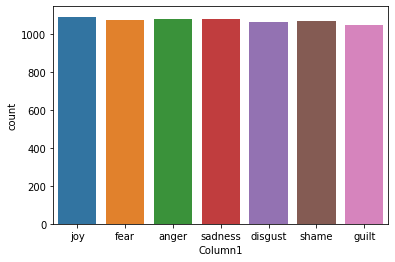

In [50]:
import seaborn as sns
sns.countplot(x = 'Column1', data = data)

In [51]:
data.Column1.unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

In [52]:
Column1 = {'joy': 0,'fear': 1,'anger':2,'sadness':3,'disgust':4,'shame':5,'guilt':6,}

In [53]:
data.Column1 = [Column1[item] for item in data.Column1] 

In [54]:
data

,Column1,Column2
0,0,On days when I feel close to my partner and ot...
1,1,Every time I imagine that someone I love or I ...
2,2,When I had been obviously unjustly treated and...
3,3,When I think about the short time that we live...
4,4,At a gathering I found myself involuntarily si...
...,...,...
7511,5,Two years back someone invited me to be the tu...
7512,5,I had taken the responsibility to do something...
7513,1,I was at home and I heard a loud sound of spit...
7514,6,I did not do the homework that the teacher had...


In [55]:
data['Column2'] = data['Column2'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [56]:
data

,Column1,Column2
0,0,on days when i feel close to my partner and ot...
1,1,every time i imagine that someone i love or i ...
2,2,when i had been obviously unjustly treated and...
3,3,when i think about the short time that we live...
4,4,at a gathering i found myself involuntarily si...
...,...,...
7511,5,two years back someone invited me to be the tu...
7512,5,i had taken the responsibility to do something...
7513,1,i was at home and i heard a loud sound of spit...
7514,6,i did not do the homework that the teacher had...


In [59]:
data['Column2'] = data['Column2'].str.replace('[^\w\s]',' ')

In [60]:
data

,Column1,Column2
0,0,on days when i feel close to my partner and ot...
1,1,every time i imagine that someone i love or i ...
2,2,when i had been obviously unjustly treated and...
3,3,when i think about the short time that we live...
4,4,at a gathering i found myself involuntarily si...
...,...,...
7511,5,two years back someone invited me to be the tu...
7512,5,i had taken the responsibility to do something...
7513,1,i was at home and i heard a loud sound of spit...
7514,6,i did not do the homework that the teacher had...


In [61]:
import nltk

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Column2'] = data['Column2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [64]:
data

,Column1,Column2
0,0,days feel close partner friends feel peace als...
1,1,every time imagine someone love could contact ...
2,2,obviously unjustly treated possibility elucida...
3,3,think short time live relate periods life thin...
4,4,gathering found involuntarily sitting next two...
...,...,...
7511,5,two years back someone invited tutor grand dau...
7512,5,taken responsibility something prepared howeve...
7513,1,home heard loud sound spitting outside door th...
7514,6,homework teacher asked us scolded immediately


In [65]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
#Lemmatisation
from textblob import Word
data['Column2'] = data['Column2'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [67]:
data

,Column1,Column2
0,0,day feel close partner friend feel peace also ...
1,1,every time imagine someone love could contact ...
2,2,obviously unjustly treated possibility elucida...
3,3,think short time live relate period life think...
4,4,gathering found involuntarily sitting next two...
...,...,...
7511,5,two year back someone invited tutor grand daug...
7512,5,taken responsibility something prepared howeve...
7513,1,home heard loud sound spitting outside door th...
7514,6,homework teacher asked u scolded immediately


In [68]:
#Correcting Letter Repetitions
import re
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)
#%%
data['Column2'] = data['Column2'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

In [69]:
data

,Column1,Column2
0,0,day feel close partner friend feel peace also ...
1,1,every time imagine someone love could contact ...
2,2,obviously unjustly treated possibility elucida...
3,3,think short time live relate period life think...
4,4,gathering found involuntarily sitting next two...
...,...,...
7511,5,two year back someone invited tutor grand daug...
7512,5,taken responsibility something prepared howeve...
7513,1,home heard loud sound spitting outside door th...
7514,6,homework teacher asked u scolded immediately


In [70]:
# Code to find the top 7100 rarest words appearing in the data
freq = pd.Series(' '.join(data['Column2']).split()).value_counts()[-7100:]

In [71]:
# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['Column2'] = data['Column2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [72]:
data

,Column1,Column2
0,0,day feel close friend feel also experience clo...
1,1,every time someone love could illness even death
2,2,treated
3,3,think short time live life think use short time
4,4,found sitting next two people opinion
...,...,...
7511,5,two year back someone daughter daughter asked ...
7512,5,taken something prepared however failed three ...
7513,1,home heard outside door thought one family mem...
7514,6,homework teacher asked u scolded


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# HELPER FUNCTIONS

def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

def read_csv(filename):
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)

        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)

    return X, Y

In [75]:
X= data.iloc[ : ,1].values

Y= data.iloc[ : , 0].values

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [77]:
Y_oh_train = convert_to_one_hot(Y_train, C = 7)
Y_oh_test = convert_to_one_hot(Y_test, C = 7)

In [78]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/content/drive/My Drive/glove.6B.50d.txt')

In [79]:
def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    """
    
    m = X.shape[0]  # number of training examples
    
    # Initialize X_indices as a numpy matrix of zeros and the correct shape
    X_indices = np.zeros((m,max_len))
    
    for i in range(m):  # loop over training examples
        
        # Convert the ith sentence in lower case and split into a list of words
        sentence_words = X[i].lower().split()
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words
        for w in sentence_words:
         
            # Set the (i,j)th entry of X_indices to the index of the correct word.
            X_indices[i, j] = word_to_index[w]
            # Increment j to j + 1
            j = j + 1
    
    return X_indices

In [80]:
X1 = np.array(["lol", "I love you", "this is very yummy"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['lol' 'I love you' 'this is very yummy']
X1_indices = [[225122.      0.      0.      0.      0.]
 [185457. 226278. 394475.      0.      0.]
 [358160. 192973. 377946. 394957.      0.]]


## Defining the Network using Pretrained Embedding Layer using GloVe Word Embeddings

In [81]:
class NN(nn.Module):
  def __init__(self, embedding, embedding_dim, hidden_dim, vocab_size, output_dim, batch_size):
      super(NN, self).__init__()

      self.batch_size = batch_size

      self.hidden_dim = hidden_dim

      self.word_embeddings = embedding

      # The LSTM takes word embeddings as inputs, and outputs hidden states
      # with dimensionality hidden_dim.
      self.lstm = nn.LSTM(embedding_dim, 
                          hidden_dim, 
                          num_layers=2,
                          dropout = 0.5,
                          batch_first = True)

      # The linear layer that maps from hidden state space to output space
      self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, sentence):
      
      #sentence = sentence.type(torch.LongTensor)
      #print ('Shape of sentence is:', sentence.shape)

      sentence = sentence.to(device)

      embeds = self.word_embeddings(sentence)
      #print ('Embedding layer output shape', embeds.shape)

      # initializing the hidden state to 0
      #hidden=None
      
      h0 = torch.zeros(2, sentence.size(0), hidden_dim).requires_grad_().to(device)
      c0 = torch.zeros(2, sentence.size(0), hidden_dim).requires_grad_().to(device)
      
      lstm_out, h = self.lstm(embeds, (h0, c0))
      # get info from last timestep only
      lstm_out = lstm_out[:, -1, :]
      #print ('LSTM layer output shape', lstm_out.shape)
      #print ('LSTM layer output ', lstm_out)

      # Dropout
      lstm_out = F.dropout(lstm_out, 0.5)

      fc_out = self.fc(lstm_out)
      #print ('FC layer output shape', fc_out.shape)
      #print ('FC layer output ', fc_out)
      
      out = fc_out
      out = F.softmax(out, dim=1)
      #print ('Output layer output shape', out.shape)
      #print ('Output layer output ', out)
      return out
  

## Creating the Glove Embedding Layer

In [82]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index, non_trainable=True):
    num_embeddings = len(word_to_index) + 1                   
    embedding_dim = word_to_vec_map["cucumber"].shape[0]  #  dimensionality of GloVe word vectors (= 50)

    # Initialize the embedding matrix as a numpy array of zeros of shape (num_embeddings, embedding_dim)
    weights_matrix = np.zeros((num_embeddings, embedding_dim))

    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        weights_matrix[index, :] = word_to_vec_map[word]

    embed = nn.Embedding.from_pretrained(torch.from_numpy(weights_matrix).type(torch.FloatTensor), freeze=non_trainable)

    return embed, num_embeddings, embedding_dim


## Training the model

In [83]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train(model, trainloader, criterion, optimizer, epochs=10):
    
    model.to(device)
    running_loss = 0
    
    train_losses, test_losses, accuracies = [], [], []
    for e in range(epochs):

        running_loss = 0
        
        model.train()
        
        for sentences, labels in trainloader:

            sentences, labels = sentences.to(device), labels.to(device)

            # 1) erase previous gradients (if they exist)
            optimizer.zero_grad()

            # 2) make a prediction
            pred = model.forward(sentences)

            # 3) calculate how much we missed
            loss = criterion(pred, labels)

            # 4) figure out which weights caused us to miss
            loss.backward()

            # 5) change those weights
            optimizer.step()

            # 6) log our progress
            running_loss += loss.item()
        
        
        else:

          model.eval()

          test_loss = 0
          accuracy = 0
          
          # Turn off gradients for validation, saves memory and computations
          with torch.no_grad():
              for sentences, labels in test_loader:
                  sentences, labels = sentences.to(device), labels.to(device)
                  log_ps = model(sentences)
                  test_loss += criterion(log_ps, labels)
                  
                  ps = torch.exp(log_ps)
                  top_p, top_class = ps.topk(1, dim=1)
                  equals = top_class == labels.view(*top_class.shape)
                  accuracy += torch.mean(equals.type(torch.FloatTensor))
                  
          train_losses.append(running_loss/len(train_loader))
          test_losses.append(test_loss/len(test_loader))
          accuracies.append(accuracy / len(test_loader) * 100)

          print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
        
    # Plot
    plt.figure(figsize=(20, 5))
    plt.plot(train_losses, c='b', label='Training loss')
    plt.plot(test_losses, c='r', label='Testing loss')
    plt.xticks(np.arange(0, epochs))
    plt.title('Losses')
    plt.legend(loc='upper right')
    plt.show()
    plt.figure(figsize=(20, 5))
    plt.plot(accuracies)
    plt.xticks(np.arange(0, epochs))
    plt.title('Accuracy')
    plt.show()
         



Epoch: 1/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.138
Epoch: 2/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.134
Epoch: 3/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.133
Epoch: 4/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.140
Epoch: 5/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.133
Epoch: 6/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.132
Epoch: 7/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.133
Epoch: 8/50..  Training Loss: 1.946..  Test Loss: 1.946..  Test Accuracy: 0.141
Epoch: 9/50..  Training Loss: 1.948..  Test Loss: 1.952..  Test Accuracy: 0.140
Epoch: 10/50..  Training Loss: 1.949..  Test Loss: 1.947..  Test Accuracy: 0.144
Epoch: 11/50..  Training Loss: 1.948..  Test Loss: 1.947..  Test Accuracy: 0.134
Epoch: 12/50..  Training Loss: 1.947..  Test Loss: 1.946..  Test Accuracy: 0.155
Epoch: 13/50..  Training Loss: 1.946.

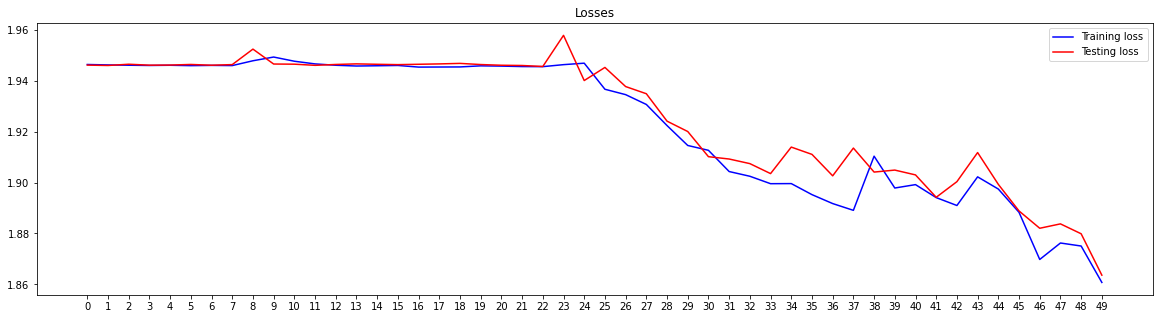

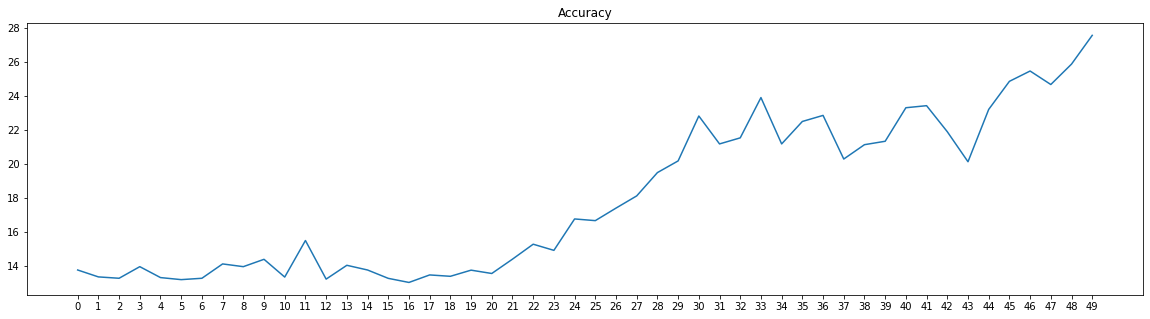

In [84]:
import torch.utils.data

maxLen = len(max(X_train, key=len).split())
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 7)

X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 7)

embedding, vocab_size, embedding_dim = pretrained_embedding_layer(word_to_vec_map, word_to_index, non_trainable=True)

hidden_dim=128
output_size=7
batch_size = 32

#print ('Embedding layer is ', embedding)
#print ('Embedding layer weights ', embedding.weight.shape)

model = NN(embedding, embedding_dim, hidden_dim, vocab_size, output_size, batch_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
epochs = 50
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_indices).type(torch.LongTensor), torch.tensor(Y_train).type(torch.LongTensor))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test_indices).type(torch.LongTensor), torch.tensor(Y_test).type(torch.LongTensor))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

train(model, train_loader, criterion, optimizer, epochs)

## Testing the Model Accuracy

In [85]:
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for sentences, labels in test_loader:
        sentences, labels = sentences.to(device), labels.to(device)
        ps = model(sentences)
        test_loss += criterion(ps, labels).item()

        # Accuracy
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
model.train()
print("Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
      "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
running_loss = 0

Test Loss: 1.867..  Test Accuracy: 0.275


## Testing the model with any sentence

In [86]:
def predict(input_text, print_sentence=True):
  labels_dict = {0:"Joy",1:"Fear",2:"Anger",3:"Sadness",4:"Disgust",5:"Shame",6:"Guilt"}

  # Convert the input to the model
  x_test = np.array([input_text])
  X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
  sentences = torch.tensor(X_test_indices).type(torch.LongTensor)

  # Get the class label
  ps = model(sentences)
  top_p, top_class = ps.topk(1, dim=1)
  label = int(top_class[0][0])

  if print_sentence:
    print("\nInput Text: \t"+ input_text +'\nEmotion: \t'+  labels_dict[label])

  return label

In [96]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
print("------------------------------------")
predict("My mother died today")
predict("You stupid")
predict("I love you aliya")
predict("I got the first prize in the competition")
predict("This is the worst day of my life")
print("\n------------------------------------")

------------------------------------

Input Text: 	My mother died today
Emotion: 	Sadness

Input Text: 	You stupid
Emotion: 	Fear

Input Text: 	I love you aliya
Emotion: 	Sadness

Input Text: 	I got the first prize in the competition
Emotion: 	Joy

Input Text: 	This is the worst day of my life
Emotion: 	Joy

------------------------------------


In [102]:
print("------------------------------------")
predict("I love you Maya")
print("\n------------------------------------")

------------------------------------

Input Text: 	I love you maya
Emotion: 	Joy

------------------------------------


In [131]:
print("------------------------------------")
predict("You stupid")
print("\n------------------------------------")

------------------------------------

Input Text: 	You stupid
Emotion: 	Anger

------------------------------------


In [105]:
print("------------------------------------")
predict("My mother died yesterday")
print("\n------------------------------------")

------------------------------------

Input Text: 	My mother died yesterday
Emotion: 	Sadness

------------------------------------


In [129]:
print("------------------------------------")
predict("Pity on you")
print("\n------------------------------------")

------------------------------------

Input Text: 	Pity on you
Emotion: 	Shame

------------------------------------


In [137]:
print("------------------------------------")
predict("Please forgive me")
print("\n------------------------------------")

------------------------------------

Input Text: 	Please forgive me
Emotion: 	Guilt

------------------------------------
